---

# University of Liverpool

## COMP534 - Applied AI

---

This notebook is associated with Assignment 1. Use it to complete the assignment by following the instructions provided in each section, which includes a text cell describing the requirements. For additional details, see the Canvas.

Use this first cell to import the necessary libraries.

In [4]:
# import libraries here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

# 1. **Data Management**


In this part, you need to:

1.   analyse and prepare the data. Use plots, graphs, and tables (such as histogram, box plots, scatterplots etc.) to better analyse the dataset and identify issues or potential improvements in the data, including (but not limited to) unnecessary feature/variable which can be dropped/removed, standardization, encoding, etc;
2.   split the data and define your experimental protocol (such as cross-validation or k-fold).

In [6]:
# Write your proposed solution code here. Create more code cells if you find it necessary

#Loading the dataset.
df = pd.read_csv("assign1-grades.csv")
#Displaying the basic info to check what type of data we are looking at.
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 31 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

In [7]:
# Identifying mean, count, min and max values.
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,Grade
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000


### Data Prepartion and Visualisation 

1. Check for Missing Values
2. Data Visualisation
3. Checking for outliers
4. Encoding the features
5. correlation check
6. Remove Unncessary features/Variables

In [9]:
#1. Checking for Missing values.

df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
Grade         0
dtype: int64

In [10]:
#Creating the target variable since we are classyfing pass or fail not the actual grade 

df['Pass'] = (df['Grade'] >= 12).astype(int)

# Dropping the original Grade column
df.drop(columns=['Grade'], inplace=True)

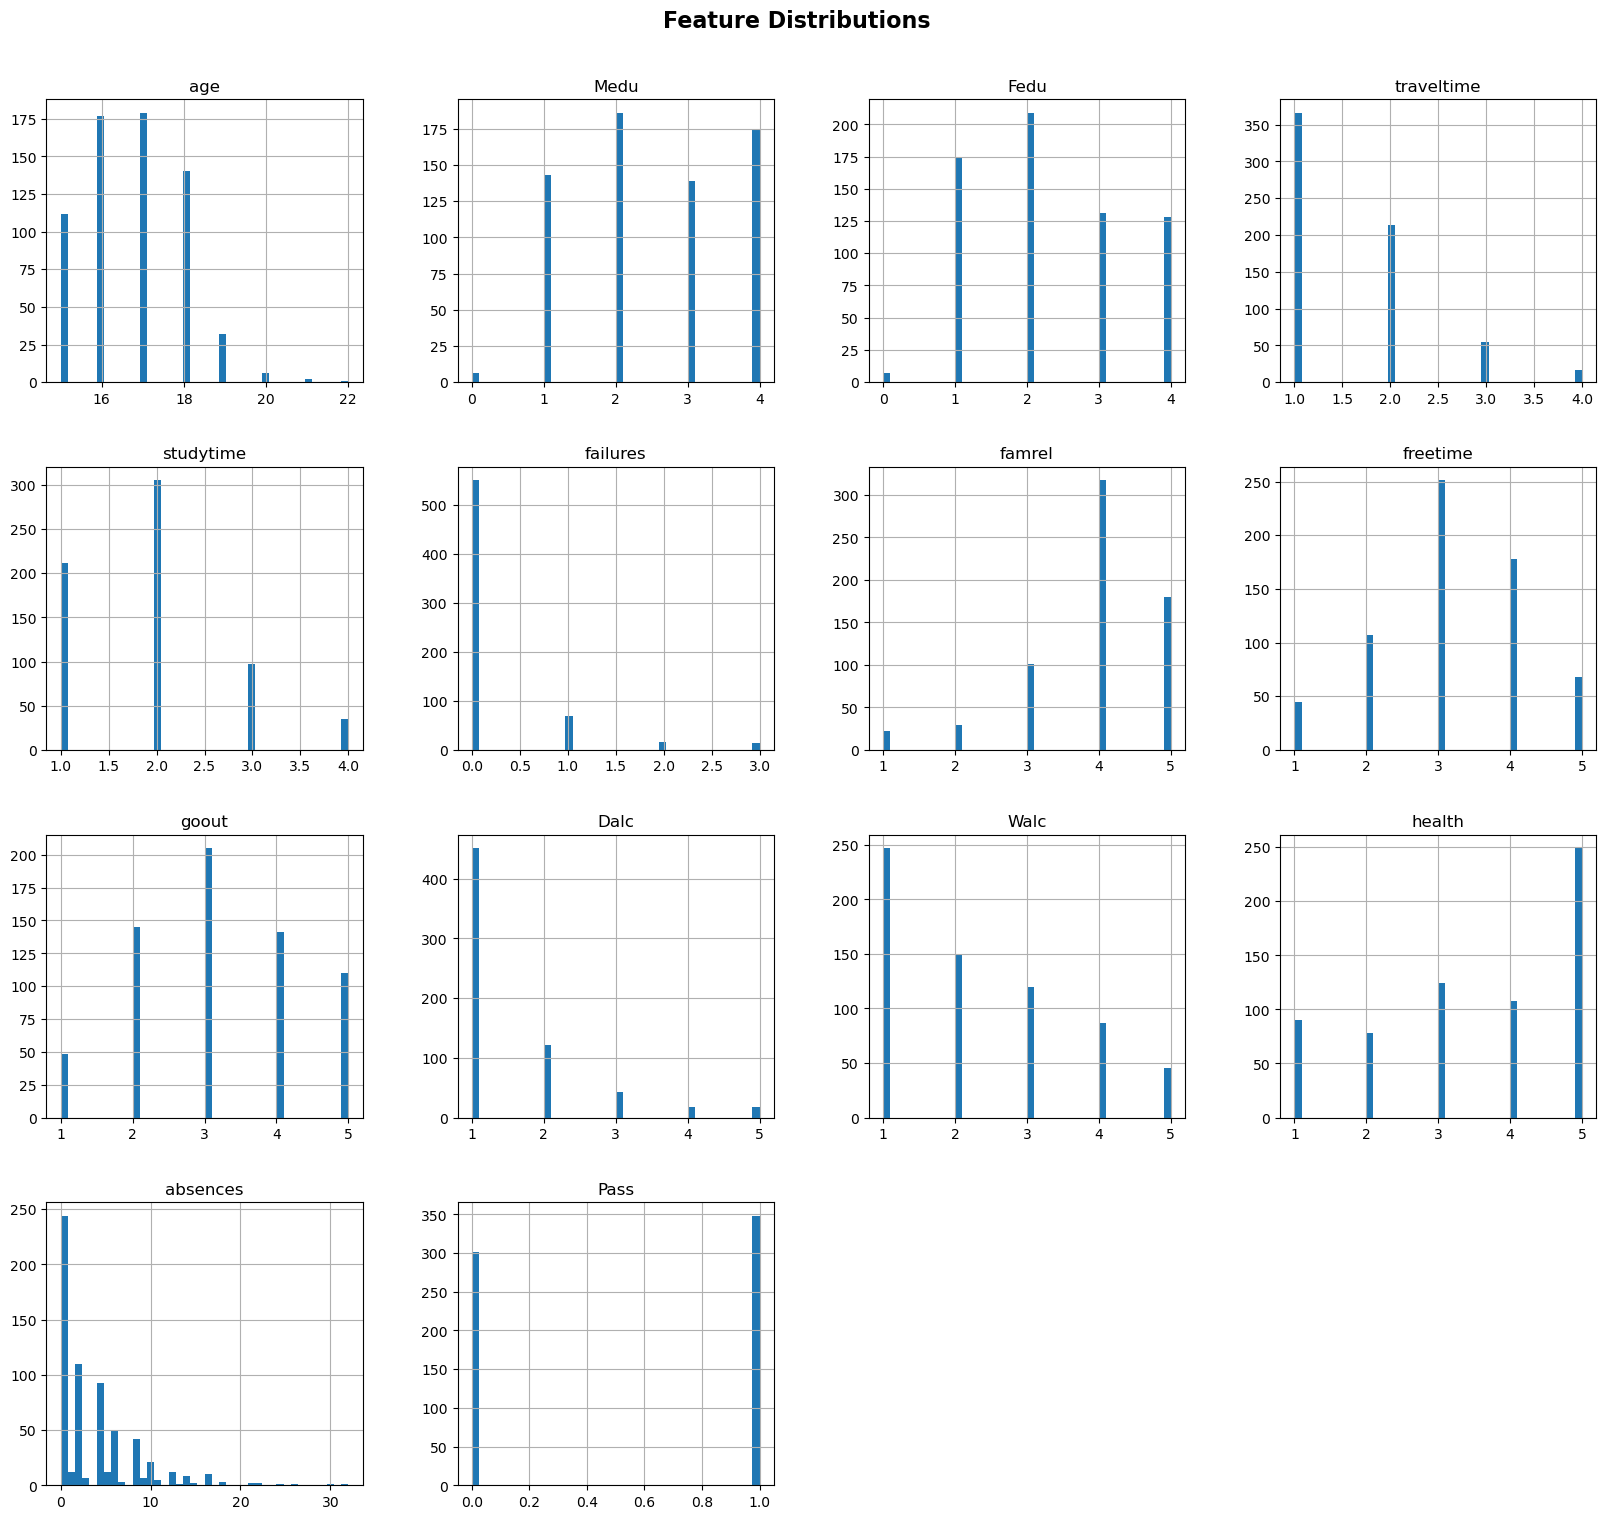

In [11]:
#2. Data Visualisation 
# Histogram for feature distributions.
df.hist(figsize=(20, 18), bins=40)
plt.suptitle("Feature Distributions", fontsize=16, y=0.93, fontweight='bold')
plt.show()


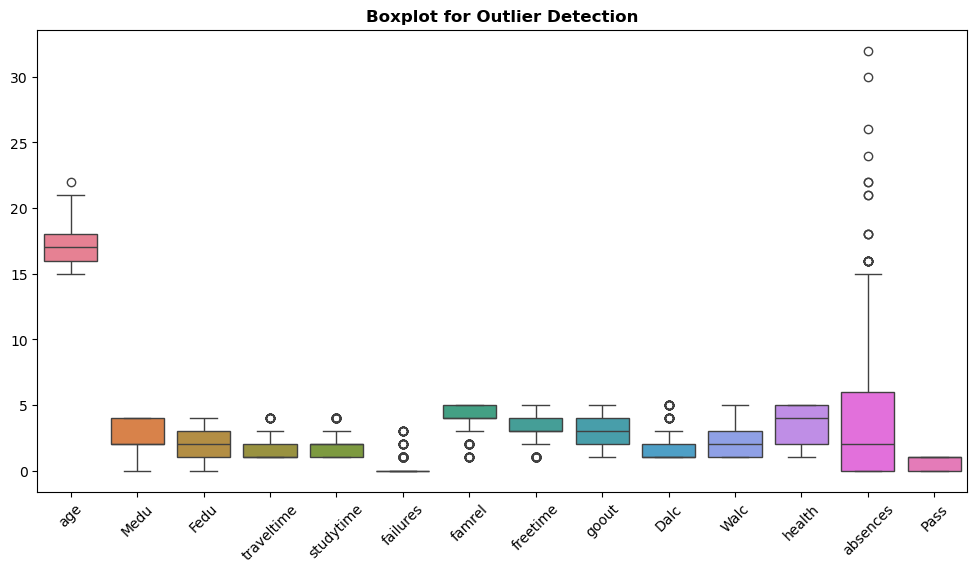

In [12]:
#3.Outlier Detection.
plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.xticks(rotation=45) 
plt.title("Boxplot for Outlier Detection", fontweight='bold')
plt.show()

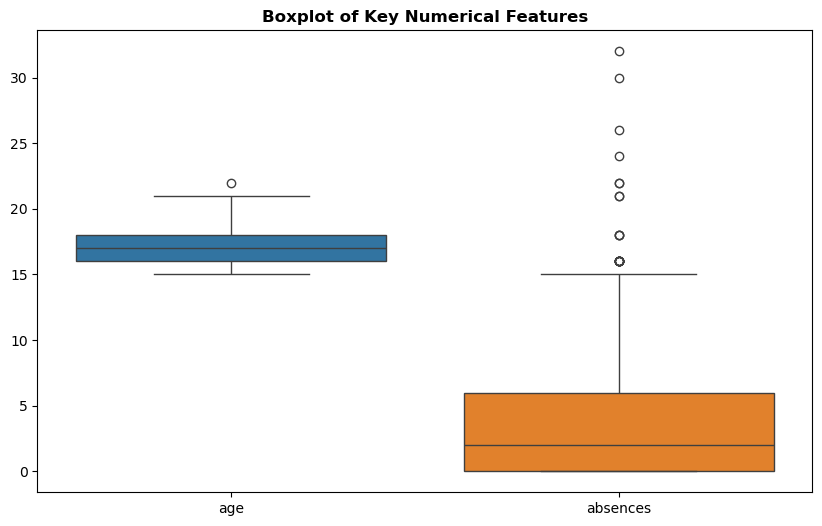

In [13]:
# Boxplot for age and absences outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['age', 'absences']])
plt.title("Boxplot of Key Numerical Features", fontweight='bold')
plt.show()

In [14]:
#Outlier check - checking count for each student age.
age_counts = df['age'].value_counts().sort_index()

age_table = pd.DataFrame({
    'Age': age_counts.index,
    'Count': age_counts.values
})

print(age_table.to_string(index=False))

 Age  Count
  15    112
  16    177
  17    179
  18    140
  19     32
  20      6
  21      2
  22      1


In [15]:
# 4. Encoding 

# Separating the numerical and categorical features to see how many numeric columns and categorical columns are present.
numeric_data = df.select_dtypes(include=[np.number])
categorical_data = df.select_dtypes(exclude=[np.number])

num_numeric = numeric_data.shape[1]
num_categorical = categorical_data.shape[1]

print(f"Number of Numerical Features: {num_numeric}")
print(f"Number of Categorical Features: {num_categorical}")


Number of Numerical Features: 14
Number of Categorical Features: 17


In [16]:
#Using Label encoding to turn the categorical features into numerical features, using label encoding for the features which has unique values.
label_encoder = LabelEncoder()
binary_features = ['school','address','sex','famsize','Pstatus','schoolsup',
                        'famsup','paid','activities','nursery','higher','internet','romantic','Pass']
for feature in binary_features:
    df[feature] = label_encoder.fit_transform(df[feature])

In [17]:
# Defining multi-category features and applying one hot encoding for these features has they have more than 3 unique values in it.
multi_category_features = ['Mjob', 'Fjob', 'guardian', 'reason']

# Apply One-Hot Encoding.
df = pd.get_dummies(df, columns=multi_category_features, drop_first=True)

# Display transformed dataset.
print(df.head())

   school  sex  age  address  famsize  Pstatus  Medu  Fedu  traveltime  \
0       0    0   18        1        0        0     4     4           2   
1       0    0   17        1        0        1     1     1           1   
2       0    0   15        1        1        1     1     1           1   
3       0    0   15        1        0        1     4     2           1   
4       0    0   16        1        0        1     3     3           1   

   studytime  ...  Mjob_teacher  Fjob_health  Fjob_other  Fjob_services  \
0          2  ...         False        False       False          False   
1          2  ...         False        False        True          False   
2          2  ...         False        False        True          False   
3          3  ...         False        False       False           True   
4          2  ...         False        False        True          False   

   Fjob_teacher  guardian_mother  guardian_other  reason_home  reason_other  \
0          True          

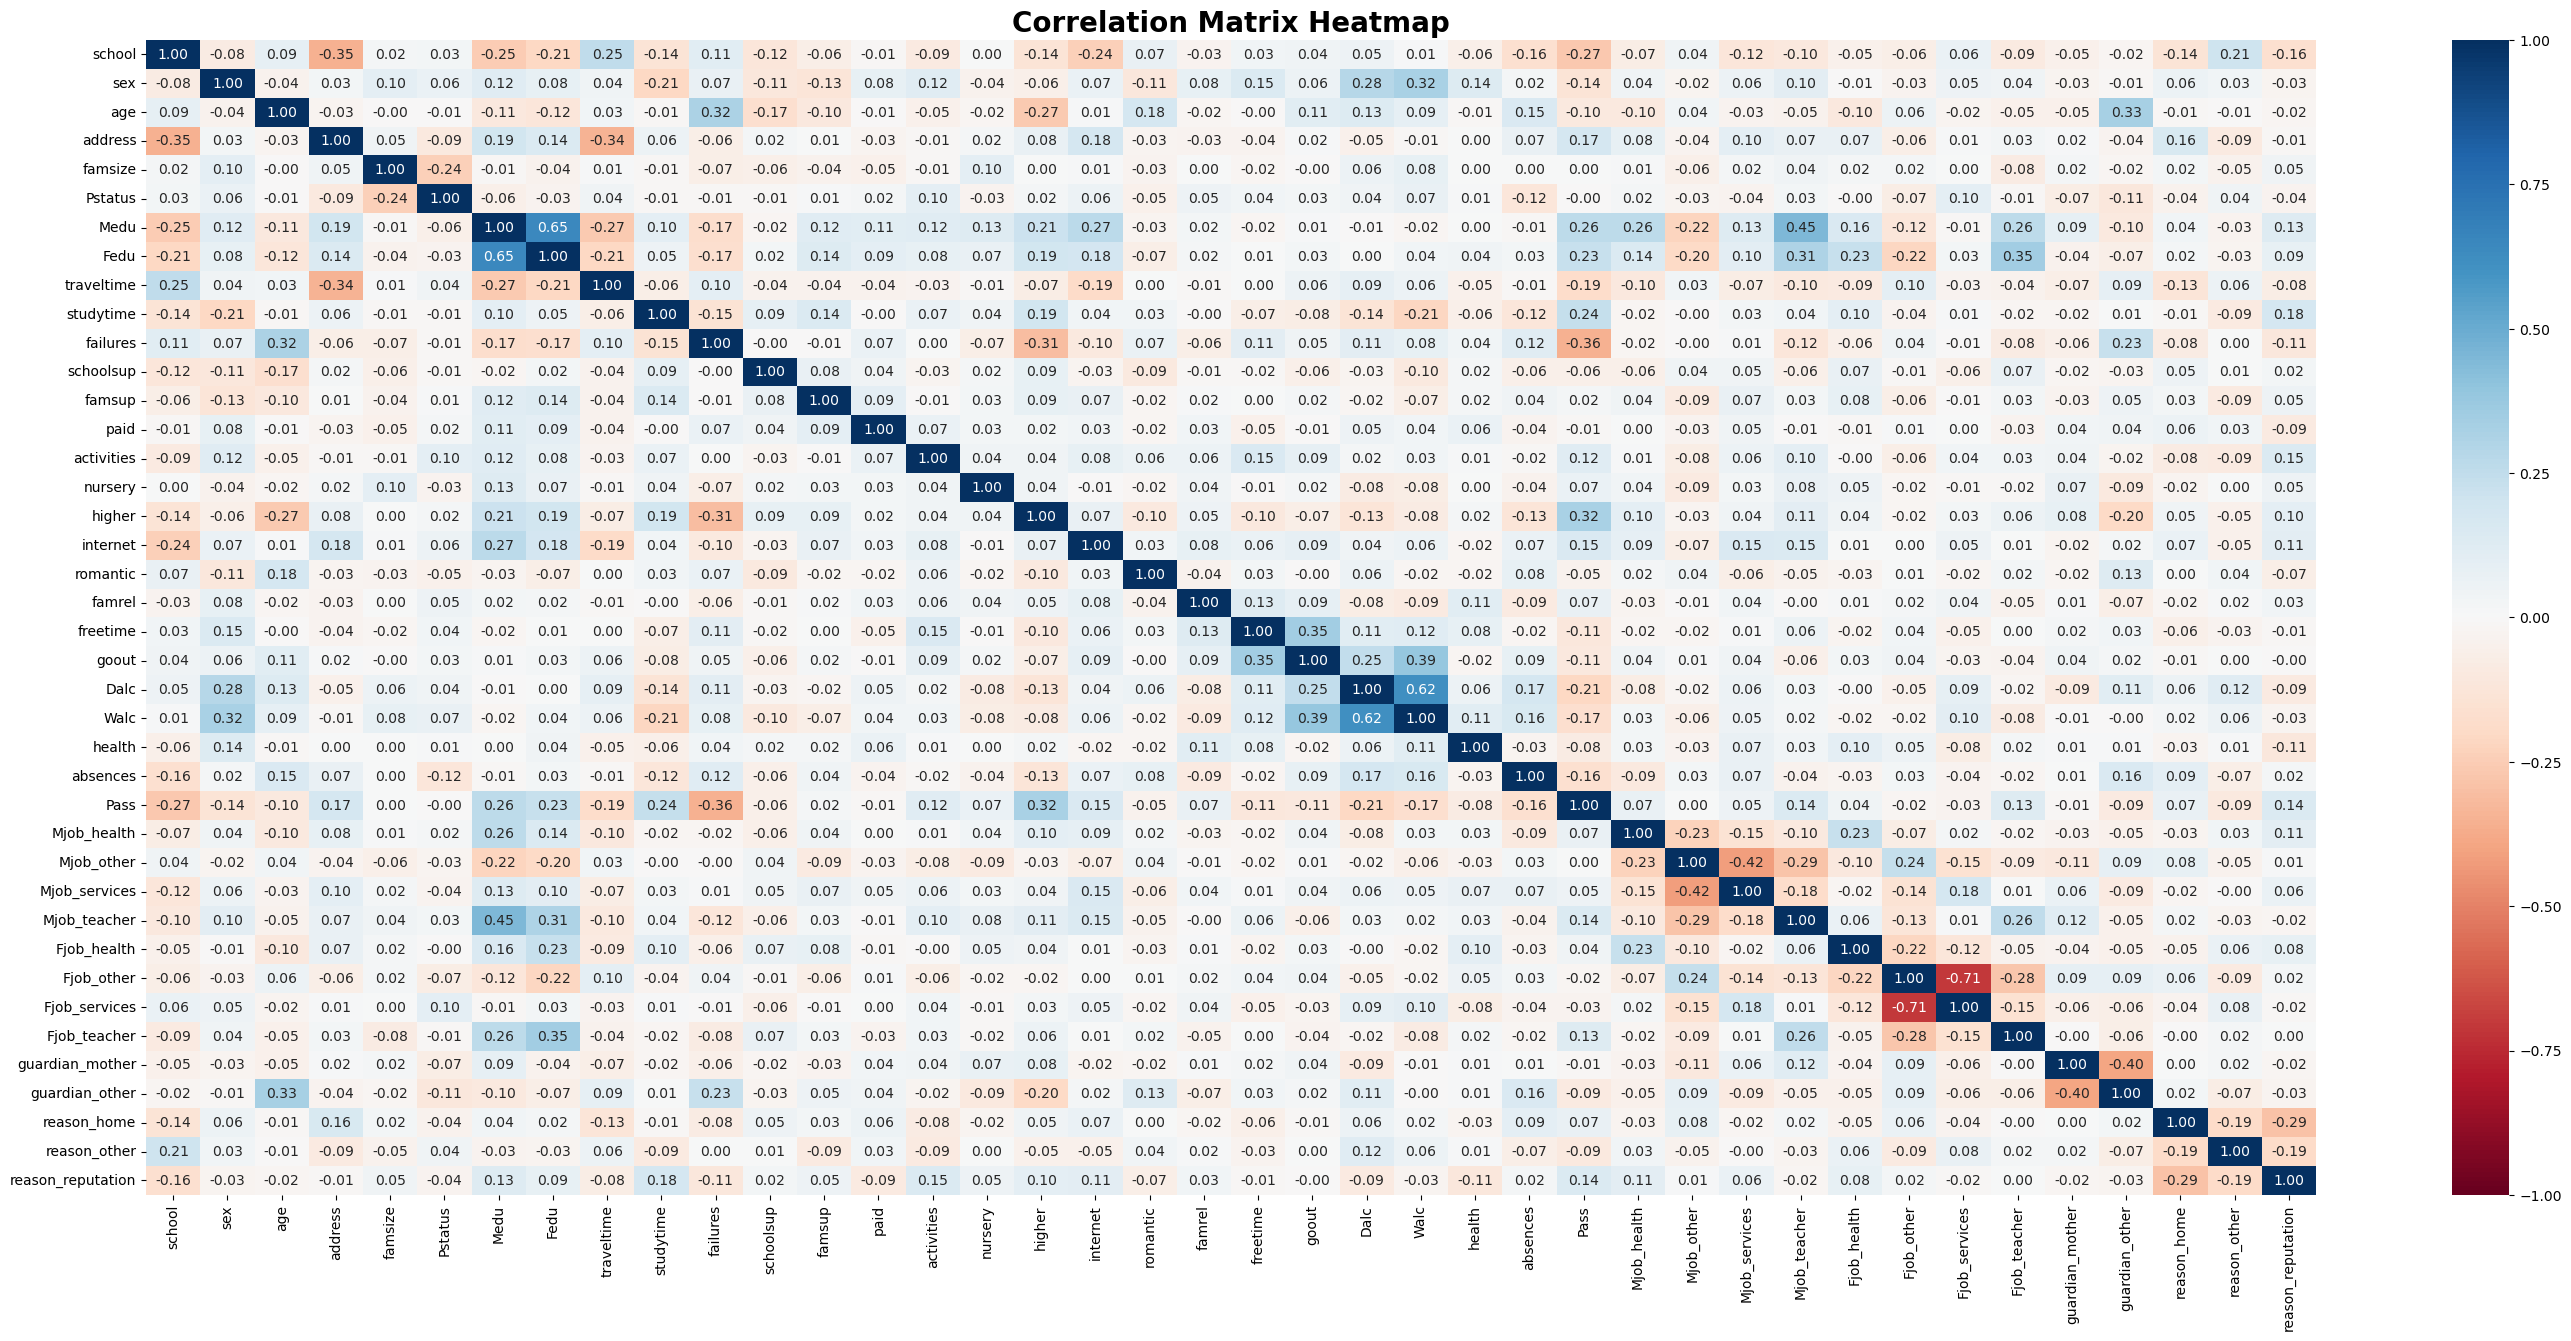

In [18]:
# 5.Correlation matrix for features.
corr_matrix = df.corr()
plt.figure(figsize=(35,15))
sns.heatmap(corr_matrix, annot=True, cmap="RdBu", center=0, vmin=-1, vmax=1, fmt=".2f")
plt.title("Correlation Matrix Heatmap", fontsize=20, fontweight='bold', color='black') 
plt.show()

In [19]:
# 6.Features dropped due to low correlation with the target (`grade`).
low_corr_features = ['famsize', 'Pstatus','schoolsup','famsup','nursery','romantic','famrel','health','Mjob_health','Mjob_other',
'Mjob_services','Fjob_health', 'guardian_mother','guardian_other','reason_home','reason_other']

# Redundant features to be dropped
redundant_features = ['Medu', 'Fjob_other', 'Walc']

# Other features to be dropped 
other_features = ['Fjob_services', 'reason_reputation']

id_features = ['school', 'address']

drop_columns = low_corr_features + id_features + redundant_features + other_features
df.drop(columns=drop_columns, inplace=True)

In [20]:
# Display columns in the dataset
df.head()

,sex,age,Fedu,traveltime,studytime,failures,paid,activities,higher,internet,freetime,goout,Dalc,absences,Pass,Mjob_teacher,Fjob_teacher
0,0,18,4,2,2,0,0,0,1,0,3,4,1,4,0,False,True
1,0,17,1,1,2,0,0,0,1,1,3,3,1,2,0,False,False
2,0,15,1,1,2,0,0,0,1,1,3,2,2,6,1,False,False
3,0,15,2,1,3,0,0,1,1,1,2,2,1,0,1,False,False
4,0,16,3,1,2,0,0,0,1,0,3,2,1,0,1,False,False


---

# 2. **Model Training**

Here, you need to:

1.	select and compare at least three machine learning models (seen/discussed during the lectures) appropriate for your modelling;
2.	if there are hyperparameters in a selected algorithm, define a hyperparameter search protocol (you can define your own), and tune them.


In [22]:
# Write your proposed solution code here. Create more code cells if you find it necessary


# Splitting the train and test data and Defining features (X) and target (y).
X = df.drop(columns=['Pass'])  
y = df['Pass'] 

# Spliting the data into 70% training and 30% testing.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


In [23]:
# Train Logistic Regression on Training Data.
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Predict on Training Data.
y_train_pred_log = log_reg.predict(X_train)

# Calculate Training Accuracy.
train_accuracy_lr = accuracy_score(y_train, y_train_pred_log)
print("Training Accuracy is:", train_accuracy_lr)


Training Accuracy is: 0.762114537444934


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [24]:
#Initialize Decision Tree model.
dt = DecisionTreeClassifier(random_state=42)

# Train the model.
dt.fit(X_train, y_train)

# Predict on training data.
y_train_pred_dt = dt.predict(X_train)

# Calculate training accuracy.
train_accuracy_dt = accuracy_score(y_train, y_train_pred_dt)
print("Decision Tree Training Accuracy:", train_accuracy_dt)


Decision Tree Training Accuracy: 0.9977973568281938


In [25]:
# Define hyperparameter grid.
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 10, None],  
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize Decision Tree model again
dt = DecisionTreeClassifier(random_state=42)

# Performing Grid Search with Cross-Validation.
grid_search_dt = GridSearchCV(dt, param_grid_dt, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_dt.fit(X_train, y_train)

# estimating the Best Model after Hyperparameter Tuning.
best_dt = grid_search_dt.best_estimator_

# Predicting on training data.
y_train_pred_dt = best_dt.predict(X_train)

# Calculate and printing the  training accuracy.
train_accuracy_dt = accuracy_score(y_train, y_train_pred_dt)
print("Decision Tree Training Accuracy after Hyperparameter Tuning:", train_accuracy_dt)
print("Best Parameters for Decision Tree:", grid_search_dt.best_params_)


Decision Tree Training Accuracy after Hyperparameter Tuning: 0.751101321585903
Best Parameters for Decision Tree: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}


In [26]:
# Initializing the Random Forest model.
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Training the model.
rf.fit(X_train, y_train)

# Predicting on training data.
y_train_pred_rf = rf.predict(X_train)

# Calculate training accuracy.
train_accuracy_rf = accuracy_score(y_train, y_train_pred_rf)
print("Random Forest Training Accuracy:", train_accuracy_rf)

Random Forest Training Accuracy: 0.9977973568281938


In [27]:
# Define hyperparameter grid.
param_grid_rf = {
    'n_estimators': [50, 100, 200],  
    'max_depth': [None, 10, 20, 30],  
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 4],  
    'bootstrap': [True, False]  
}

# Initialize Random Forest model.
rf = RandomForestClassifier(random_state=42)

# Perform Grid Search with Cross-Validation.
grid_search_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_rf.fit(X_train, y_train)

# Best Model after Hyperparameter Tuning.
best_rf = grid_search_rf.best_estimator_

# Predict on training data.
y_train_pred_rf = best_rf.predict(X_train)

# Calculate and print training accuracy.
train_accuracy_rf = accuracy_score(y_train, y_train_pred_rf)
print("Random Forest Training Accuracy after Hyperparameter Tuning:", train_accuracy_rf)
print("Best Parameters for Random Forest:", grid_search_rf.best_params_)


Random Forest Training Accuracy after Hyperparameter Tuning: 0.8392070484581498
Best Parameters for Random Forest: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 50}


In [28]:
#Comparing all the models and finding the best model based on the accuracy.

# Store training accuracies.
training_accuracies = {
    "Logistic Regression": train_accuracy_lr,
    "Decision Tree": train_accuracy_dt,
    "Random Forest": train_accuracy_rf
}

# Print training accuracies for all models.
for model_name, accuracy in training_accuracies.items():
    print(f"{model_name} Training Accuracy: {accuracy:.4f}")

# Find the best model based on training accuracy.
best_model_name = max(training_accuracies, key=training_accuracies.get)
best_train_accuracy = training_accuracies[best_model_name]

print(f"\nBest Model Based on Training Accuracy: {best_model_name} with Accuracy: {best_train_accuracy:.4f}")


Logistic Regression Training Accuracy: 0.7621
Decision Tree Training Accuracy: 0.7511
Random Forest Training Accuracy: 0.8392

Best Model Based on Training Accuracy: Random Forest with Accuracy: 0.8392


---

# 3. **Evaluate models**

Here, you need to:

1.	test the model (the best one you obtained from the above stage) on the testing dataset.


In [30]:
# Write your proposed solution code here. Create more code cells if you find it necessary
# Predicting on test data using the best model.
y_test_pred = best_rf.predict(X_test)

# Calculate test accuracy.
test_accuracy = accuracy_score(y_test, y_test_pred)

# Print test accuracy with more decimal places.
print(f"Random Forest Test Accuracy after Hyperparameter Tuning: {test_accuracy:.6f}")




Random Forest Test Accuracy after Hyperparameter Tuning: 0.769231


In [31]:
# Calculating and printing the accuracy of random forest model. 
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Random Forest Test Accuracy: {test_accuracy:.6f}")

Random Forest Test Accuracy: 0.769231


In [32]:
# Classification report on the best model - random forest. 
print("Classification Report:")
print(classification_report(y_test, y_test_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.72      0.74        90
           1       0.77      0.81      0.79       105

    accuracy                           0.77       195
   macro avg       0.77      0.77      0.77       195
weighted avg       0.77      0.77      0.77       195



In [33]:
# Calculating the ROC-AUC score for random forest. 
y_test_pred_proba = best_rf.predict_proba(X_test)[:, 1]  
roc_auc = roc_auc_score(y_test, y_test_pred_proba)
print(f"ROC-AUC Score: {roc_auc:.6f}")

ROC-AUC Score: 0.811746


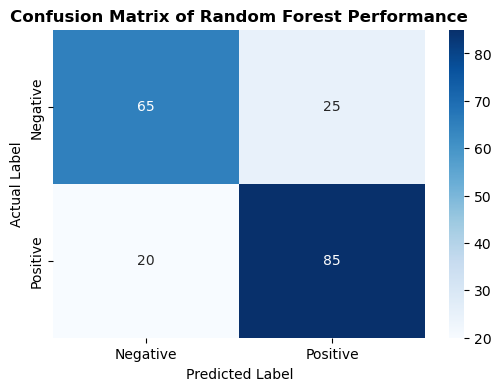

In [34]:
# Plotting and discussing the Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred)

# Plot Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix of Random Forest Performance', fontweight="bold")
plt.show()